Objective

The goal of this model is to predict the quality of wine (score between 0–10) based on various physicochemical features (chemical properties). This is a supervised regression problem.

Dataset:
The dataset contains two types of wines: red and white, with the following features:

Fixed acidity – concentration of non-volatile acids

Volatile acidity – amount of acetic acid (too much leads to sour taste)

Citric acid – contributes to freshness

Residual sugar – leftover sugar after fermentation

Chlorides – salt content

Free sulfur dioxide – prevents spoilage

Total sulfur dioxide – total amount of SO₂

Density – related to sugar/alcohol content

pH – acidity level

Sulphates – contributes to wine preservation

Alcohol – percentage of alcohol in wine

Quality (target variable) – score given by wine tasters (0–10)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
#read the wine csv data
data = pd.read_csv('winequalityN.csv')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#lets check if we have any missing values
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
#lets handle the missing values first
data['fixed acidity'] = data['fixed acidity'].fillna(data['fixed acidity'].median())
data['volatile acidity'] = data['volatile acidity'].fillna(data['volatile acidity'].median())
data['citric acid'] = data['citric acid'].fillna(data['citric acid'].median())
data['residual sugar'] = data['residual sugar'].fillna(data['residual sugar'].median())
data['chlorides'] = data['chlorides'].fillna(data['chlorides'].median())
data['pH'] = data['pH'].fillna(data['pH'].median())
data['sulphates'] = data['sulphates'].fillna(data['sulphates'].median())


In [7]:
#now lets check again if we still have any missing values
data.isnull().sum()
#so we successfully handle all the missing values

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

`Now Lets handle the inconsistencies in the data
`

In [8]:
#check the duplocates in our data
print(data.duplicated().sum())


1168


In [9]:
#lets drop all the dup becsue we dont need them in our model and it is vary model to model and problem to problem datastes as well
data = data.drop_duplicates().reset_index(drop=True)

In [10]:
#after removing the dup lets check if they still exists
print(data.duplicated().sum())

0


`Now Lets Handle The Outliers`

Outliers in column 'fixed acidity':
86       9.8
144      9.8
179     10.2
307     10.0
736     10.3
        ... 
5203    11.7
5216    10.0
5220     9.9
5281    11.1
5286    11.2
Name: fixed acidity, Length: 304, dtype: float64
------------------------------
Outliers in column 'volatile acidity':
190     0.685
319     0.905
804     0.705
885     0.680
1252    0.850
        ...  
5304    0.690
5309    0.700
5313    0.715
5320    0.725
5322    0.740
Name: volatile acidity, Length: 279, dtype: float64
------------------------------
Outliers in column 'citric acid':
84      0.66
118     0.67
179     0.88
252     0.70
394     0.70
        ... 
4888    0.68
4890    0.68
5043    0.68
5093    0.68
5306    0.78
Name: citric acid, Length: 143, dtype: float64
------------------------------
Outliers in column 'residual sugar':
0       20.70
10      19.25
34      17.95
90      18.90
92      16.50
        ...  
3627    16.30
3793    19.25
3839    18.35
3840    18.40
3863    19.40
Name: residual suga

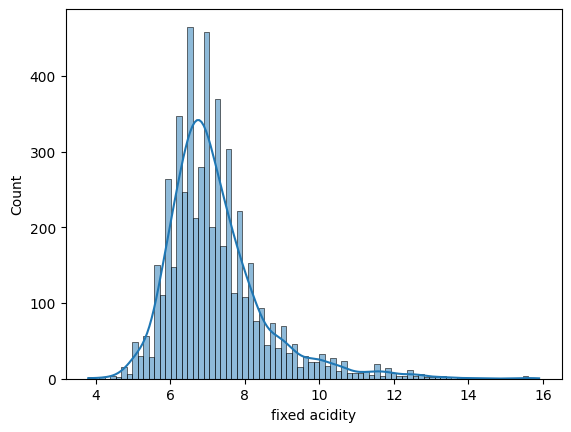

In [11]:

#here we just define the function and checking the oultliers for the each colmns
def detect_outliers(data):
    outlier_indices = {}
    for col in data.select_dtypes(include='number').columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outlier_indices[col] = list(outliers)
    return outlier_indices

# Usage
outliers = detect_outliers(data)
# Assuming 'outliers' is the dictionary from the previous code
for col, indices in outliers.items():
    print(f"Outliers in column '{col}':")
    if indices:
        print(data.loc[indices, col])
    else:
        print("No outliers found.")
    print("-" * 30)

sns.histplot(data['fixed acidity'], kde=True)
plt.show()


Since we have the outliers in all the colmns and we cant just drop them because whine depends on the diff factors so the outliers here is very imp for us in this case we just need to scale the values

In [12]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [13]:
X = data.drop("quality", axis=1)
y = data["quality"]

# Choose columns to scale (exclude wine_type)
cols_to_scale = [col for col in X.columns if col != "type"]

scaler = RobustScaler()
X_scaled = X.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [14]:
X_scaled

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,0.000000,-0.166667,0.3125,3.157895,-0.071429,0.68,0.683544,1.391685,-0.954545,-0.352941,-0.842105
1,white,-0.538462,0.000000,0.1875,-0.192982,0.071429,-0.56,0.202532,-0.140044,0.409091,-0.117647,-0.473684
2,white,0.846154,-0.111111,0.5625,0.736842,0.107143,0.08,-0.240506,0.100656,0.227273,-0.411765,-0.157895
3,white,0.153846,-0.388889,0.0625,1.017544,0.392857,0.76,0.886076,0.210066,-0.090909,-0.647059,-0.263158
4,white,-0.615385,0.111111,-0.9375,0.754386,-0.071429,0.08,0.253165,0.056893,-0.136364,-0.235294,-0.421053
...,...,...,...,...,...,...,...,...,...,...,...,...
5324,red,-0.153846,1.777778,-1.4375,-0.140351,0.750000,0.00,-0.987342,0.409190,0.954545,1.823529,-0.473684
5325,red,-0.615385,1.666667,-1.4375,-0.122807,1.535714,0.16,-0.911392,0.056893,1.090909,0.411765,0.052632
5326,red,-0.846154,1.388889,-1.3125,-0.087719,0.535714,0.44,-0.822785,0.105033,1.409091,0.000000,0.421053
5327,red,-0.846154,1.916667,-1.1875,-0.122807,1.000000,0.16,-0.911392,0.181619,1.636364,1.176471,-0.105263


As u can see in the upper values we scale all the values except the type and quality

Lets do the feature encoding and convert the type into the numerical variable because we have only 2 types right

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()
X_scaled['type'] = encoder.fit_transform(X_scaled['type'])


In [17]:
X_scaled

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,0.000000,-0.166667,0.3125,3.157895,-0.071429,0.68,0.683544,1.391685,-0.954545,-0.352941,-0.842105
1,1,-0.538462,0.000000,0.1875,-0.192982,0.071429,-0.56,0.202532,-0.140044,0.409091,-0.117647,-0.473684
2,1,0.846154,-0.111111,0.5625,0.736842,0.107143,0.08,-0.240506,0.100656,0.227273,-0.411765,-0.157895
3,1,0.153846,-0.388889,0.0625,1.017544,0.392857,0.76,0.886076,0.210066,-0.090909,-0.647059,-0.263158
4,1,-0.615385,0.111111,-0.9375,0.754386,-0.071429,0.08,0.253165,0.056893,-0.136364,-0.235294,-0.421053
...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,-0.153846,1.777778,-1.4375,-0.140351,0.750000,0.00,-0.987342,0.409190,0.954545,1.823529,-0.473684
5325,0,-0.615385,1.666667,-1.4375,-0.122807,1.535714,0.16,-0.911392,0.056893,1.090909,0.411765,0.052632
5326,0,-0.846154,1.388889,-1.3125,-0.087719,0.535714,0.44,-0.822785,0.105033,1.409091,0.000000,0.421053
5327,0,-0.846154,1.916667,-1.1875,-0.122807,1.000000,0.16,-0.911392,0.181619,1.636364,1.176471,-0.105263


SO now we almost complete the pre processing our data lets move and train our model

In [18]:
#First lets select the features for training and testing
X = X_scaled[['type','fixed acidity', 'volatile acidity', 'citric acid', 
              'residual sugar', 'chlorides', 'free sulfur dioxide', 
              'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y = data['quality']


In [19]:
#lets divide our data for the test and training
from sklearn.model_selection import train_test_split

In [20]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#lets fit the data into the model
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(train_X, train_y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_predict = model.predict(test_X)
y_predict

array([5.58474729, 5.59570509, 5.4855097 , ..., 5.74591051, 5.12697575,
       5.33066067], shape=(1066,))

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [25]:
#lets evaluate the perforance of our model

#evaluate the error
print(f'MSE = {mean_squared_error(test_y, y_predict)}')
print(f'R2 = {r2_score(test_y, y_predict)}')
print(f'RMSE = {np.sqrt(mean_squared_error(test_y, y_predict))}')

MSE = 0.5605044907933866
R2 = 0.27911365614045114
RMSE = 0.748668478562699


`By the way the performance of the model is below average because the R square value is low 0.2 but its not the worst we can improve this by creating the more relations between the data like feature engineering or we can use the different models as well for detecting the comples relation between the data. Or we can apply the Gradient Descent to optimize our model`

In [268]:
#Now lets save this model
import joblib

joblib.dump(model, "/Users/apple/Desktop/Machine-Learning/saved-models/wine_quality_model.pkl")


['/Users/apple/Desktop/Machine-Learning/saved-models/wine_quality_model.pkl']

In [112]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
